# **Visualisation et statistiques descriptives**
---

## Introduction<a class="anchor" id="partie1"></a>

Ce notebook contient les codes nécessaires à la visualisation et les statistiques descriptives de notre base de données.

## Sommaire

* [Introduction](#partie1)
* [Statistiques descriptives](#partie2)
* [Visualisation](#partie3)
    * [Données de PIB](#partie31)
    * [Données d'heures de travail](#partie32)


In [47]:
!pip install -r requirements.txt

In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [49]:
# Importation des données
df = pd.read_excel("Données_produites/base_de_données_v1.xlsx")

# Indexation
df = df.set_index('Unnamed: 0')

## Statistiques descriptives <a class="anchor" id="partie2"></a>

Dans une volonté de rendre compte des valeurs manquantes à notre dataframe nous créons un dataframe qui comprend l'ensemble des valeurs manquantes 

In [50]:
df_missing_binary = df.isnull().astype(int)
df_missing_binary

,CPI_Austria,PIB_Austria,LT_IR_Austria,ST_IR_Austria,WH_Austria,P_Growth_Austria,CPI_Belgium,PIB_Belgium,LT_IR_Belgium,ST_IR_Belgium,...,LT_IR_Switzerland,ST_IR_Switzerland,WH_Switzerland,P_Growth_Switzerland,CPI_United_Kingdom,PIB_United_Kingdom,LT_IR_United_Kingdom,ST_IR_United_Kingdom,WH_United_Kingdom,P_Growth_United_Kingdom
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1995-Q1,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1995-Q2,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1995-Q3,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1995-Q4,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,0,0,0
1996-Q1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-Q4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,0,0,1,1
2024-Q1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,0,0,1,1
2024-Q2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,1,0,0,1,1


In [51]:
df_nan = df.isna()
df_nan = pd.DataFrame({
    "TIME_PERIOD_WITH_NAN": df_nan.apply(lambda col: list(df.index[col]), axis = 0)
})
df_nan.to_csv("df_nan.csv", index=True, encoding="utf-8")
print(df_nan)

                                                      TIME_PERIOD_WITH_NAN
CPI_Austria                           [1995-Q1, 1995-Q2, 1995-Q3, 1995-Q4]
PIB_Austria                                                      [2024-Q4]
LT_IR_Austria                                                           []
ST_IR_Austria                                                           []
WH_Austria                            [1998-Q2, 1998-Q3, 1998-Q4, 2024-Q4]
...                                                                    ...
PIB_United_Kingdom       [2020-Q4, 2021-Q1, 2021-Q2, 2021-Q3, 2021-Q4, ...
LT_IR_United_Kingdom                                                    []
ST_IR_United_Kingdom                                                    []
WH_United_Kingdom        [1998-Q3, 1998-Q4, 1999-Q1, 2020-Q4, 2021-Q1, ...
P_Growth_United_Kingdom  [2022-Q1, 2022-Q2, 2022-Q3, 2022-Q4, 2023-Q1, ...

[168 rows x 1 columns]


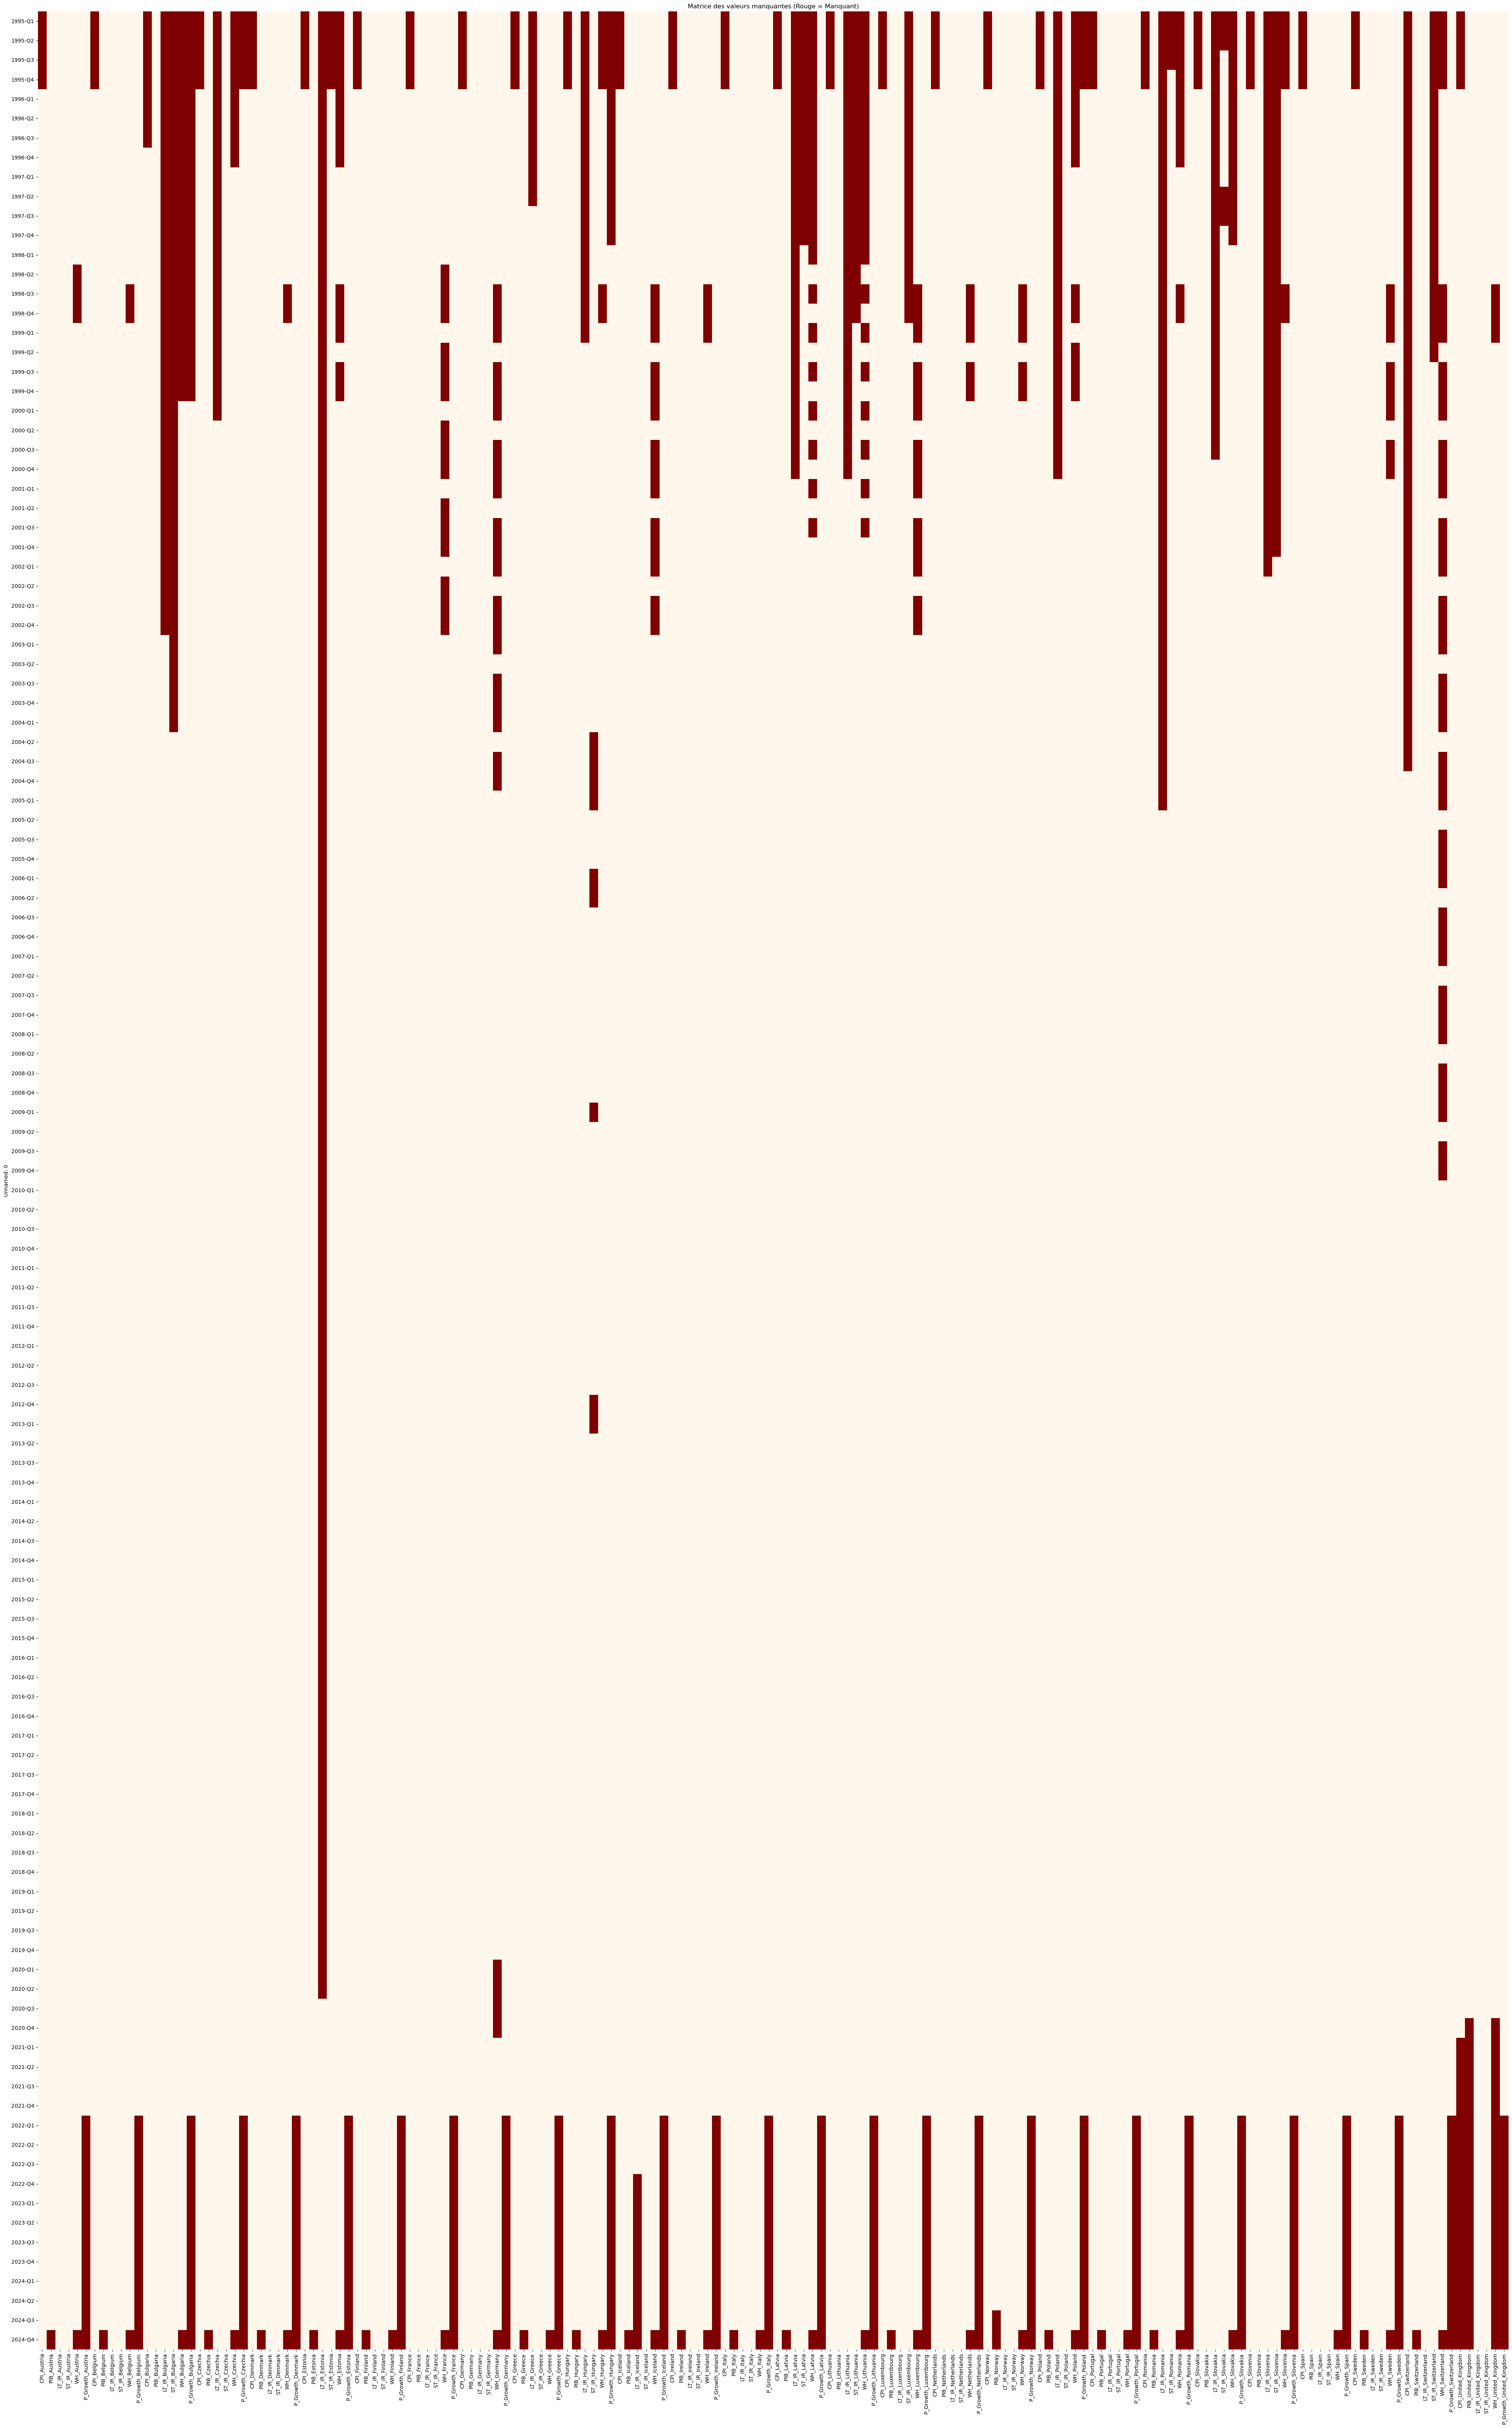

In [52]:
# Définir la figure avec un affichage interactif
fig, ax = plt.subplots(figsize=(50, 80))

# Utiliser seaborn pour une meilleure visualisation sans grille
sns.heatmap(df_missing_binary, cmap="OrRd", cbar=False, linewidths=0, ax=ax, square=False)

# Ajouter un titre
ax.set_title("Matrice des valeurs manquantes (Rouge = Manquant)")

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Afficher la figure
plt.show()

## Visualisation <a class="anchor" id="partie3"></a>

### Données de PIB <a class="anchor" id="partie31"></a>

Pour notre rendu de mi-parcours nous avons présenté les évolutions des PIB en France et dans les principaux pays d'Europe. Nous faisons d'abord celui de la France.

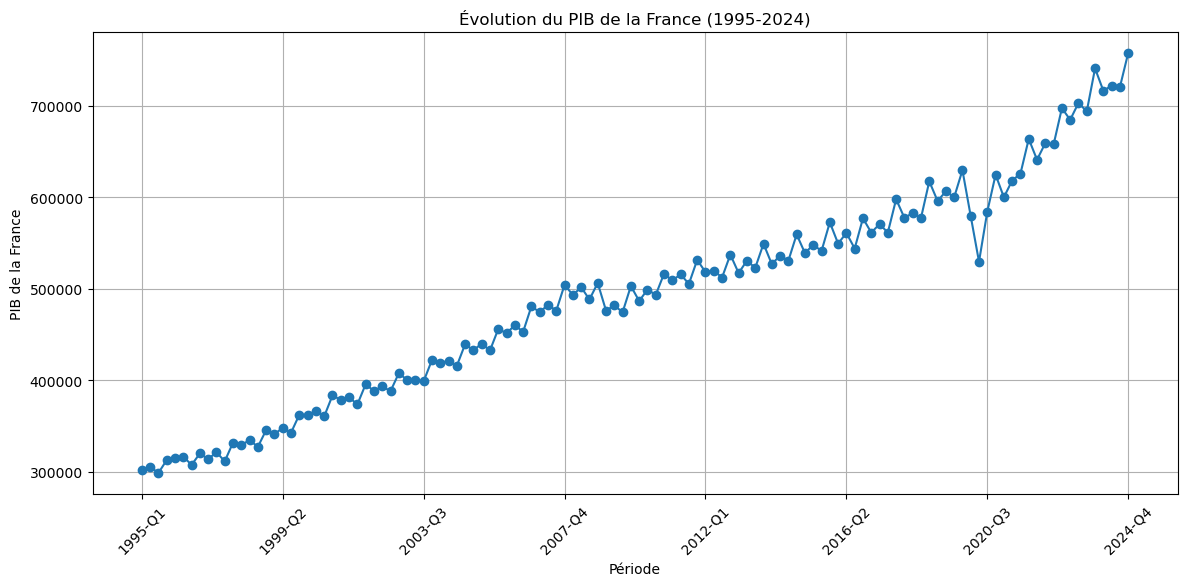

In [53]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df_plot['PIB_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("PIB de la France")
plt.title("Évolution du PIB de la France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 8  # Nombre de labels affichés sur l'axe X
indices = np.linspace(0, len(df_plot.index) - 1, num_ticks, dtype=int)  # Espacement des indices
plt.xticks(df.index[indices], rotation=45)  # Appliquer les labels espacés
plt.grid(True)
plt.show()

Et ensuite pour l'Europe

/tmp/ipykernel_122208/2752722650.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(df_selected.columns))  # Utilisation d'une palette de couleurs


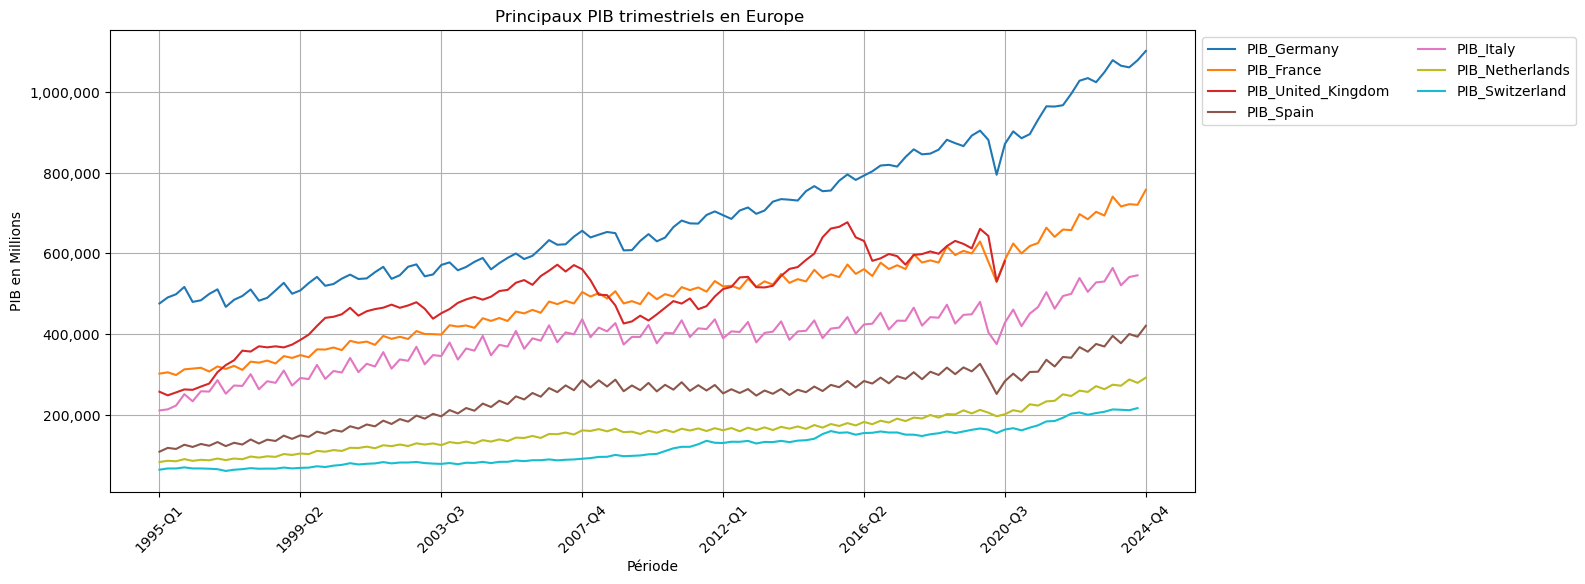

In [54]:
selected_countries = ['PIB_Germany', 'PIB_France', 'PIB_United_Kingdom','PIB_Spain', 'PIB_Italy', 'PIB_Netherlands', 'PIB_Switzerland']

df_selected = df[selected_countries]

colors = plt.cm.get_cmap("tab10", len(df_selected.columns))  # Utilisation d'une palette de couleurs
plt.figure(figsize=(14, 6))

for i, country in enumerate(df_selected.columns): #enumerate permet de sélectionner l'élément et son indice
    plt.plot(df_selected.index, df_selected[country], label=country, color=colors(i))

# Personnalisation du graphique
plt.xlabel("Période")
plt.ylabel("PIB en Millions")
plt.title("Principaux PIB trimestriels en Europe ")

# Indicage
num_ticks = 8 
indices = np.linspace(0, len(df_selected.index) - 1, num_ticks, dtype=int)  
plt.xticks(df_selected.index[indices], rotation=45) 

# Affichage 
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), ncol=2)  # Légende en dehors du graphique
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}")) #permet de ne pas avoir d'écriture scientifique
plt.show()


### Données d'heures travaillées <a class="anchor" id="partie32"></a>

Voici l'évolution des heures travaillées en France.

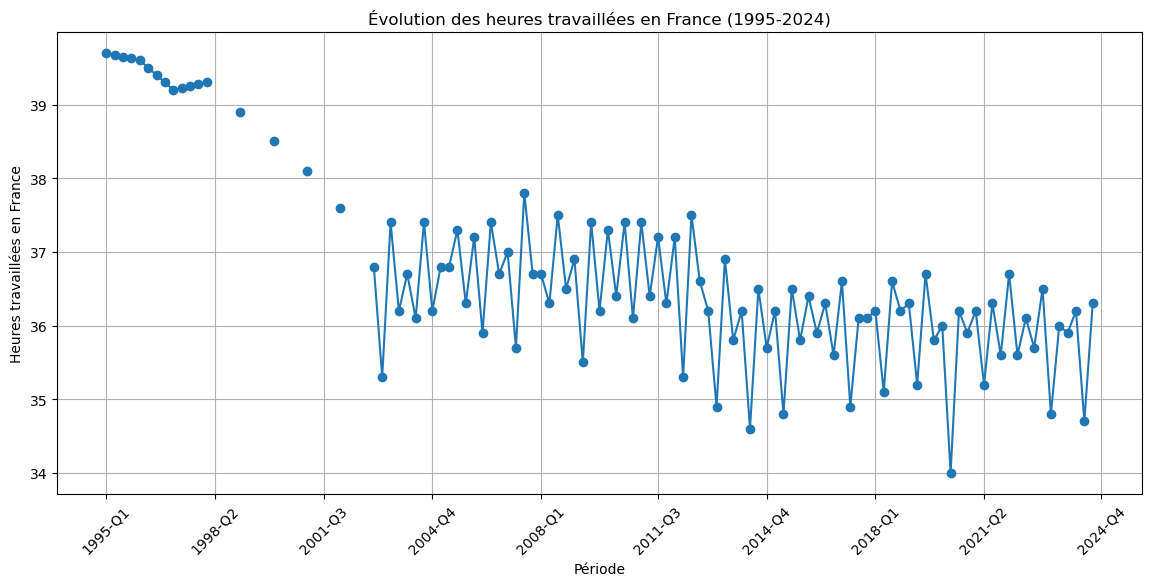

In [55]:
plt.figure(figsize=(14, 6))  # Taille du graphique

plt.plot(df.index, df_plot['WH_France'], marker='o', linestyle='-')

plt.xlabel("Période")
plt.ylabel("Heures travaillées en France")
plt.title("Évolution des heures travaillées en France (1995-2024)")

# Sélectionner un sous-ensemble des labels de l'axe X pour éviter la surcharge
num_ticks = 10 
indices = np.linspace(0, len(df.index) - 1, num_ticks, dtype=int)
plt.xticks(df.index[indices], rotation=45)
plt.grid(True)
plt.show()